### Regressão Logística

#### Importando bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

#### Importando dados

In [34]:
data = pd.read_csv('./data/Eleicao.csv', sep=';')
data.shape

(47, 3)

In [4]:
data.head()

,CANDIDATO,SITUACAO,DESPESAS
0,George Turner,0,10
1,Victor Johnson,0,100
2,Jerry Perry,1,1600
3,Shirley Cook,1,1500
4,Carolyn Bailey,1,3300


#### Visualização gráfica dos dados

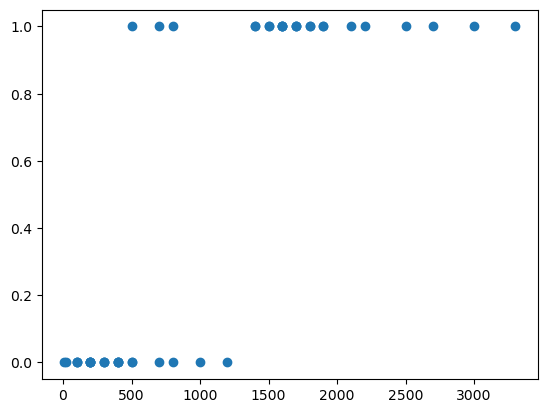

In [18]:
plt.scatter(data.DESPESAS, data.SITUACAO)

In [19]:
data.drop(columns=['CANDIDATO']).describe()

,SITUACAO,DESPESAS
count,47.000000,47.000000
mean,0.510638,1085.744681
std,0.505291,870.968338
min,0.000000,10.000000
25%,0.000000,300.000000
50%,1.000000,800.000000
75%,1.000000,1700.000000
max,1.000000,3300.000000


#### Visualização do coeficiente de corelação entre o atributo 'despesas' e 'situação'

In [21]:
np.corrcoef(data.DESPESAS, data.SITUACAO)

array([[1.        , 0.81218717],
       [0.81218717, 1.        ]])

#### Criação das variavéis X e Y (variável independente e variável dependente)
Transformação de X para o formato de matriz adicionando um novo eixo (newaxis)

In [24]:
x = data.iloc[:, 2].values
x = x[:, np.newaxis]
y = data.iloc[:, 1].values

#### Criação do modelo, treinamento e visualização dos coeficientes

In [31]:
modelo = LogisticRegression()
modelo.fit(x,y)
modelo.coef_
modelo.intercept_

array([-4.60287217])

#### Geração de novos dados para gerar a função sigmoide

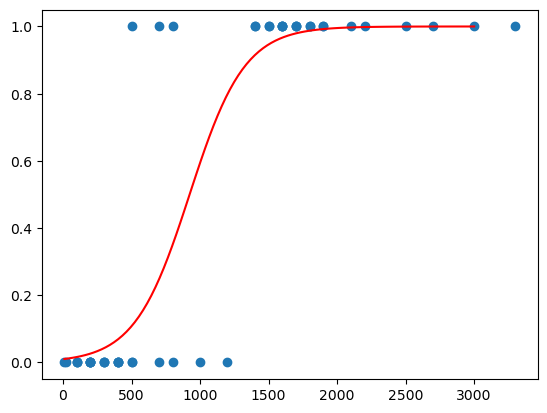

In [30]:
x_teste = np.linspace(10, 3000, 100)
# implementando a função sigmoide
def model(x):
    return 1 / (1 + np.exp(-x))

# geração de previções (variável r) e visualização dos resultados
r = model(x_teste * modelo.coef_ + modelo.intercept_).ravel()
plt.scatter(x,y)
plt.plot(x_teste,r, color='red')

#### Importando dados de novos candidatos

In [41]:
data_previsao = pd.read_csv('./data/NovosCandidatos.csv', sep=';')
data_previsao.head()

,CANDIDATO,DESPESAS
0,A,0
1,B,10
2,C,200
3,D,500
4,E,900


#### Mudança dos dados para matriz

In [46]:
despesas = data_previsao.iloc[:, 1].values
despesas = despesas.reshape(-1, 1)

#### Previsão e geração de nova base de dados com os valores originais e previsões

In [53]:
previsoes_teste = modelo.predict(despesas)
previsoes_teste

array([0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [55]:
data_previsao = np.column_stack((data_previsao, previsoes_teste))
data_previsao

array([['A', 0, 0],
       ['B', 10, 0],
       ['C', 200, 0],
       ['D', 500, 0],
       ['E', 900, 0],
       ['F', 1500, 1],
       ['G', 3000, 1]], dtype=object)